In [1]:
%load_ext autoreload
%autoreload 2

In [12]:
import torch
import torch.nn.functional as F
from overfit.models.primingnet import PrimingNet
from overfit.utils.img2vid import zigzag, display_video
from PIL import Image
import torchvision.transforms.functional as FT
from torchvision.models import resnet152, ResNet152_Weights


In [8]:
import matplotlib
import matplotlib.pyplot as plt


In [9]:
%matplotlib widget

In [13]:
srcnet = resnet152(weights=ResNet152_Weights.IMAGENET1K_V1)
tgtnet = PrimingNet(pretrained_classifier=srcnet)

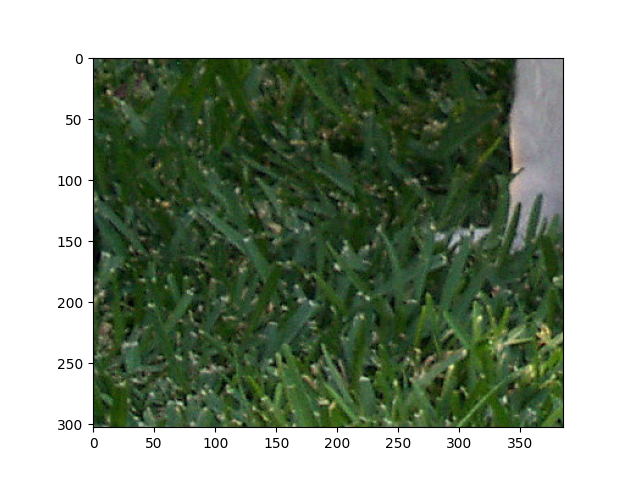

In [14]:
input_image = Image.open("dog.jpg")
input_tensor = FT.to_tensor(input_image)
_, h, w = input_tensor.size()
input_video = zigzag(input_tensor, h // 4, w // 4)
vid = display_video(input_video)
plt.show()


In [18]:
def normalize_rgb(img):
    return FT.normalize(img, mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])

for ix, img in enumerate(input_video):
    img_batch = img.unsqueeze(0)
    out = srcnet(img_batch)
    print(ix)
    # print(F.softmax(out, dim=1))


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
